# (Ford GoBike System Data Exploration)
## by (Ali Khater)

## Investigation Overview

> In this investigation, I wanted to look at the relationship between age of bikers and duration of the trips, and how could gender and user type affect this relationship.

## Dataset Overview

> This document explores a dataset containing information for approximately 183,000 bike trips using Ford GoBike System.


> The Features included in the Data are as follows :

      - Member Year of Birth
      -  Member Gender
      - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
      - Trip Duration(in seconds)
      - Bike ID
      - Start Time and Date
      - End Time and Date
      - Start Station ID
      - End Station ID
      - Start Station Name
      - End Station Name
      - End Station Latitude
      - End Station Longitude
      - Start Station Latitude
      - Start Station Longitude

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('fordgobike_tripdata.csv')
data.drop(['start_station_id', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_latitude',
           'end_station_longitude','bike_id'],axis =1,inplace = True)
data.dropna(inplace = True)
data['age'] = 2019 - data['member_birth_year']
data['duration'] = data['duration_sec'] / 60 


## Question 1 : What is the distribution of 'gender' feature?


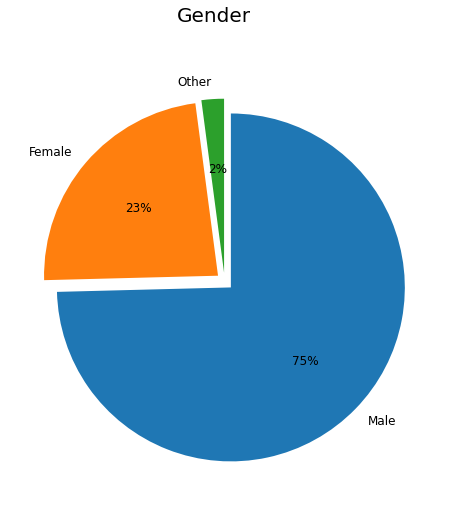

In [7]:
sorted_counts = data['member_gender'].value_counts()
plt.figure(figsize=[12, 8])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,
       explode=[0.05, 0.05, 0.05], autopct='%1.0f%%', textprops = {'fontsize': 12});
plt.suptitle('Gender', fontsize = 20);

## Question 2 : What is the relationship between age and duration?



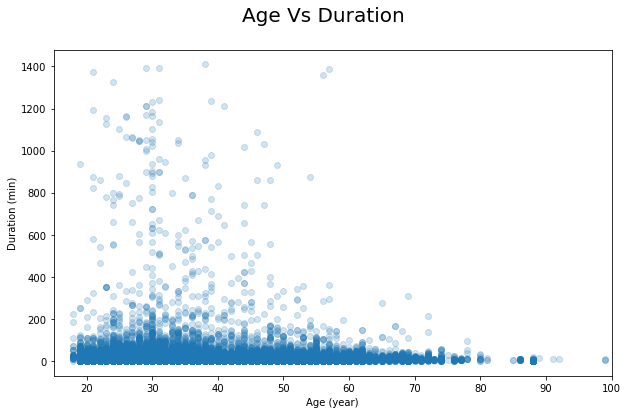

In [20]:
plt.figure(figsize=[10,6])
plt.scatter(data = data, x='age', y='duration', alpha=0.2)
plt.xlabel('Age (year)')
plt.xlim(15,100)
plt.ylabel('Duration (min)');
plt.suptitle('Age Vs Duration', fontsize = 20);

> We can clearly see that people older than 60 don't tend to have trips longer than 200 minutes at all, Unlike people between 20 years and 50 years who sometimes spend more than 500 minutes or even 1000 minutes!

## Question 3 :  How does the categorical feature 'user type' affect the relationship between trip duration and age?



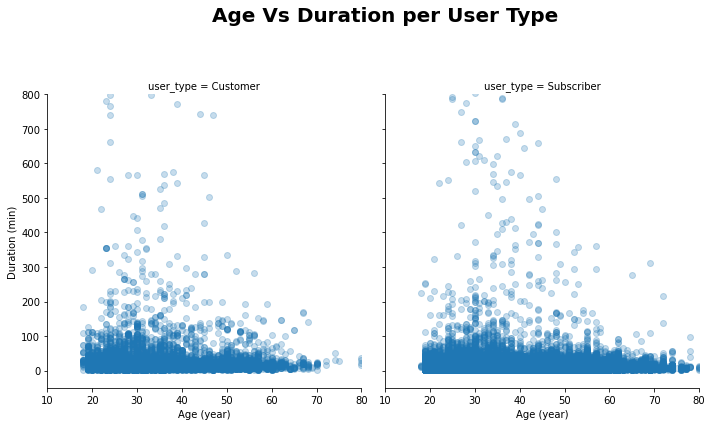

In [27]:
g = sb.FacetGrid(data = data, col = 'user_type', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [-50, 800])
g.map(plt.scatter, 'age', 'duration', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (min)');
plt.text(x=10, y=1000, s='Age Vs Duration per User Type', fontsize=20, weight='bold', ha='center', va='bottom');


> In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.